DataFrames de Pandas
Ejercicio

Carga de datos desde excel 
   pd.read_excel("nombre del archivo",sheet_name="nombre hoja")
   
Filtrado de columnas

df_nuevo = df_original[[Lista de nombres de columnas a dejar]]

Filtrado de Filas

df_nuevo = df_original[(expresion booleana)]

Ejemplo:

df_nuevo =df_original[ ( (df_original["seriex"]=="valorafiltrar") 
                                    & (df_original["seriey"]=="valorafiltrar2") 
                                    & (df_original["seriew"]=="valorafiltra3"))
                               ]

Agrupamiento

df_nuevo = df_original.groupby([lista de columnas para agrupar])["columna a operar "].sum().reset_index()


df_nuevo=df_original.groupby([columnas])["columna a calcular"].agg(nombrenuevacolumna='sum', nombreotranuevacolumna='count').reset_index()


para guardar dataframe en archivo excel

df_nuevo.to_excel("nombrenuevo.xlsx")

Origen de los datos
https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data


In [17]:
import pandas as pd
covid_norte=pd.read_excel("20210818Norte de santander.xlsx")
covid_norte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88187 entries, 0 to 88186
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fecha reporte web             88187 non-null  datetime64[ns]
 1   ID de caso                    19751 non-null  float64       
 2   Fecha de notificación         88187 non-null  datetime64[ns]
 3   Código DIVIPOLA departamento  88187 non-null  int64         
 4   Nombre departamento           88187 non-null  object        
 5   Código DIVIPOLA municipio     88187 non-null  float64       
 6   Nombre municipio              88187 non-null  object        
 7   Edad                          88187 non-null  int64         
 8   Unidad de medida de edad      88187 non-null  int64         
 9   Sexo                          88187 non-null  object        
 10  Tipo de contagio              88187 non-null  object        
 11  Ubicación del caso          

In [2]:
"""
seleccion de columnas
"""
columnas_de_interes=["fecha reporte web","Nombre municipio","Edad","Unidad de medida de edad","Sexo","Tipo de contagio","Estado","Fecha de inicio de síntomas","Fecha de muerte"]
covid_norte=covid_norte[columnas_de_interes]
covid_norte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88187 entries, 0 to 88186
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha reporte web            88187 non-null  datetime64[ns]
 1   Nombre municipio             88187 non-null  object        
 2   Edad                         88187 non-null  int64         
 3   Unidad de medida de edad     88187 non-null  int64         
 4   Sexo                         88187 non-null  object        
 5   Tipo de contagio             88187 non-null  object        
 6   Estado                       87801 non-null  object        
 7   Fecha de inicio de síntomas  86988 non-null  datetime64[ns]
 8   Fecha de muerte              4518 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 6.1+ MB


In [18]:
covid_norte.to_excel("massimple.xlsx")

In [4]:
covid_norte.tail(3)

,fecha reporte web,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Estado,Fecha de inicio de síntomas,Fecha de muerte
88184,2021-08-17,CUCUTA,3,1,M,En estudio,Leve,2021-07-31,NaT
88185,2021-08-17,CUCUTA,47,1,M,En estudio,Leve,2021-07-31,NaT
88186,2021-08-17,CUCUTA,46,1,M,En estudio,Leve,2021-07-31,NaT


In [19]:
df_pamplona=covid_norte[covid_norte["Nombre municipio"]=="PAMPLONA"  ]

df_pamplona.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 97 to 88159
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fecha reporte web             4740 non-null   datetime64[ns]
 1   ID de caso                    836 non-null    float64       
 2   Fecha de notificación         4740 non-null   datetime64[ns]
 3   Código DIVIPOLA departamento  4740 non-null   int64         
 4   Nombre departamento           4740 non-null   object        
 5   Código DIVIPOLA municipio     4740 non-null   float64       
 6   Nombre municipio              4740 non-null   object        
 7   Edad                          4740 non-null   int64         
 8   Unidad de medida de edad      4740 non-null   int64         
 9   Sexo                          4740 non-null   object        
 10  Tipo de contagio              4740 non-null   object        
 11  Ubicación del caso          

<AxesSubplot:xlabel='fecha reporte web'>

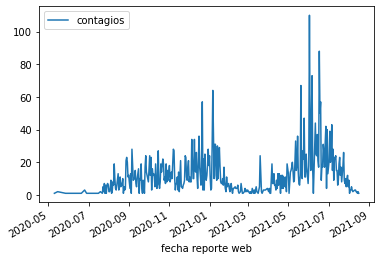

In [6]:
df_pamplona1=df_pamplona.groupby("fecha reporte web")["Edad"].agg(contagios="count").reset_index()
df_pamplona1.plot(x="fecha reporte web",y="contagios")

<AxesSubplot:xlabel='Fecha de muerte'>

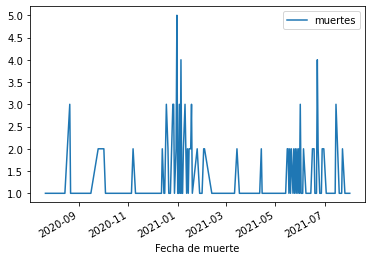

In [7]:
df_pamplona2=df_pamplona[df_pamplona["Fecha de muerte"].isnull()==False ]
#df_pamplona2.info()
df_pamplona2=df_pamplona2.groupby("Fecha de muerte")["Edad"].agg(muertes="count").reset_index()
df_pamplona2.plot(x="Fecha de muerte",y="muertes")

In [13]:
covid_norte_por_municipio = covid_norte.groupby(["Nombre municipio","Sexo"])["Edad"].count().reset_index()
covid_norte_por_municipio.to_csv("hola.csv")

<AxesSubplot:xlabel='fecha reporte web'>

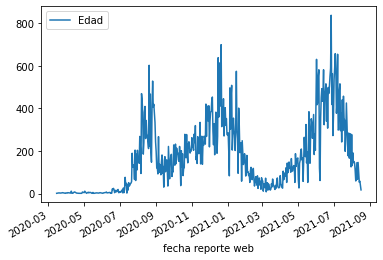

In [14]:
df_porfecha=covid_norte.groupby("fecha reporte web")["Edad"].count().reset_index()
df_porfecha.plot(x="fecha reporte web",y="Edad")

In [15]:
df_nuevo=pd.read_csv("hola.csv")
df_nuevo

,Unnamed: 0,Nombre municipio,Sexo,Edad
0,0,ABREGO,F,264
1,1,ABREGO,M,230
2,2,ARBOLEDAS,F,101
3,3,ARBOLEDAS,M,118
4,4,BOCHALEMA,F,142
...,...,...,...,...
75,75,TOLEDO,M,259
76,76,VILLA CARO,F,56
77,77,VILLA CARO,M,44
78,78,VILLA DEL ROSARIO,F,2984
